In [179]:
import numpy as np
import pandas as pd
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn for building logistic regression model
from sklearn.linear_model import LogisticRegression

In [180]:
df=pd.read_csv("application_record.csv")

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [182]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [183]:
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [184]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [185]:
#Checking the unique value counts in columns
featureValues={}
for d in df.columns.tolist():
    count=df[d].nunique()
    if count==1:
        featureValues[d]=count
# List of columns having same 1 unique value        
cols_to_drop= list(featureValues.keys())
print("Columns having 1 unique value are :n",cols_to_drop)

Columns having 1 unique value are :n ['FLAG_MOBIL']


In [186]:
#Drop employee_id column as it is just a unique id
df.drop('FLAG_MOBIL',inplace=True,axis=1)

#Checking null percentage
df.isnull().mean()*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.601039
CNT_FAM_MEMBERS         0.000000
dtype: float64

In [187]:
#Find out mode value for education
df["OCCUPATION_TYPE"].mode()
#fill missing value with mode
df["OCCUPATION_TYPE"]= df["OCCUPATION_TYPE"].fillna("Laborers")

EDA

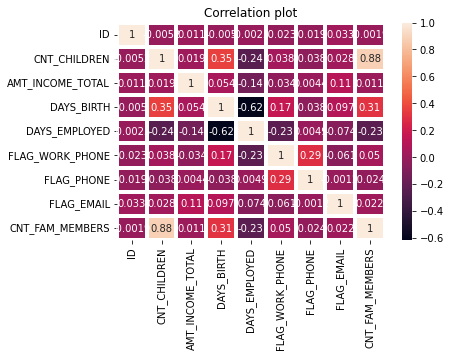

In [188]:
#correlation between features
corr_plot = sns.heatmap(df.corr(),annot = True,linewidths=3 )
plt.title("Correlation plot")
plt.show()

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_WORK_PHONE      438557 non-null  int64  
 13  FLAG_PHONE           438557 non-null  int64  
 14  FLAG_EMAIL           438557 non-null  int64  
 15  OCCUPATION_TYPE  

In [190]:
inputs = df.drop(['ID','CNT_CHILDREN','NAME_FAMILY_STATUS','DAYS_BIRTH','FLAG_WORK_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_PHONE'],axis=1)
inputs

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_EMPLOYED
0,M,Y,Y,427500.0,Working,Higher education,-4542
1,M,Y,Y,427500.0,Working,Higher education,-4542
2,M,Y,Y,112500.0,Working,Secondary / secondary special,-1134
3,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,-3051
4,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,-3051
...,...,...,...,...,...,...,...
438552,M,N,Y,135000.0,Pensioner,Secondary / secondary special,365243
438553,F,N,N,103500.0,Working,Secondary / secondary special,-3007
438554,F,N,N,54000.0,Commercial associate,Higher education,-372
438555,F,N,Y,72000.0,Pensioner,Secondary / secondary special,365243


In [191]:
print(df['CODE_GENDER'].unique())
print(df['FLAG_OWN_CAR'].unique())
print(df['FLAG_OWN_REALTY'].unique())
print(df['AMT_INCOME_TOTAL'].unique())
print(df['NAME_INCOME_TYPE'].unique())
print(df['NAME_EDUCATION_TYPE'].unique())
print(df['DAYS_EMPLOYED'].unique())

['M' 'F']
['Y' 'N']
['Y' 'N']
[ 427500.    112500.    270000.    283500.    135000.    130500.
  157500.    405000.    211500.    360000.    126000.    315000.
  247500.    297000.    225000.    166500.    216000.    255150.
  148500.    202500.     94500.    450000.    180000.     90000.
  765000.    382500.    144000.    229500.    292500.     74250.
   40500.    337500.    193500.    267750.    139500.     67500.
  252000.    900000.    115290.    279000.     76500.    234000.
   81000.    108000.     99000.    198000.     45000.    238500.
  117000.    153000.   1350000.    445500.    495000.     85500.
  306000.    562500.    189000.    328500.    310500.    540000.
  171000.    675000.    121500.     72000.     65250.    184500.
  103500.    162000.    165150.     54000.    243000.    256500.
   33300.    697500.    101250.     58500.    110250.    472500.
  196650.    630000.    432000.    257625.    143100.    207000.
  288000.    131400.    720000.    261000.     99900.     38

In [192]:
df.nunique

<bound method DataFrame.nunique of              ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYP

Feature Engineering

In [193]:
# LabelEncoder
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
inputs['CODE-GENDER'] = enc.fit_transform(inputs['CODE_GENDER'])
inputs['FLAG-OWN-CAR']= enc.fit_transform(inputs['FLAG_OWN_CAR'])
inputs['FLAG-OWN-REALTY']= enc.fit_transform(inputs['FLAG_OWN_REALTY'])
inputs['NAME-INCOME-TYPE']= enc.fit_transform(inputs['NAME_INCOME_TYPE'])
inputs['NAME-EDUCATION-TYPE']= enc.fit_transform(inputs['NAME_EDUCATION_TYPE'])

In [194]:
inputs

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,CODE-GENDER,FLAG-OWN-CAR,FLAG-OWN-REALTY,NAME-INCOME-TYPE,NAME-EDUCATION-TYPE
0,M,Y,Y,427500.0,Working,Higher education,-4542,1,1,1,4,1
1,M,Y,Y,427500.0,Working,Higher education,-4542,1,1,1,4,1
2,M,Y,Y,112500.0,Working,Secondary / secondary special,-1134,1,1,1,4,4
3,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,-3051,0,0,1,0,4
4,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,-3051,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
438552,M,N,Y,135000.0,Pensioner,Secondary / secondary special,365243,1,0,1,1,4
438553,F,N,N,103500.0,Working,Secondary / secondary special,-3007,0,0,0,4,4
438554,F,N,N,54000.0,Commercial associate,Higher education,-372,0,0,0,0,1
438555,F,N,Y,72000.0,Pensioner,Secondary / secondary special,365243,0,0,1,1,4


In [195]:
inputs_n=inputs.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','DAYS_EMPLOYED'],axis=1)
inputs_n

,AMT_INCOME_TOTAL,CODE-GENDER,FLAG-OWN-CAR,FLAG-OWN-REALTY,NAME-INCOME-TYPE,NAME-EDUCATION-TYPE
0,427500.0,1,1,1,4,1
1,427500.0,1,1,1,4,1
2,112500.0,1,1,1,4,4
3,270000.0,0,0,1,0,4
4,270000.0,0,0,1,0,4
...,...,...,...,...,...,...
438552,135000.0,1,0,1,1,4
438553,103500.0,0,0,0,4,4
438554,54000.0,0,0,0,0,1
438555,72000.0,0,0,1,1,4


In [196]:
targets_n=inputs_n['CODE-GENDER']

In [197]:
targets_n

0         1
1         1
2         1
3         0
4         0
         ..
438552    1
438553    0
438554    0
438555    0
438556    0
Name: CODE-GENDER, Length: 438557, dtype: int64

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n,targets_n, test_size=0.2, random_state=0)

In [199]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [200]:
model.fit(X_train,y_train)

LogisticRegression()

In [201]:
model.score(X_test,y_test)

0.6761902590295512

In [203]:
model.predict([[427500.0,1,1,1,4,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([1])

In [205]:
model.predict([[427500.0,1,1,1,4,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([1])

In [206]:
model.predict([[112500.0,1,1,1,4,4]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([0])